In [4]:
#Import all the necessary libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
import os
os.getcwd()

'/Users/nabinagahatraj/Desktop/BDA66/Day 2'

In [20]:
#Load or Read the dataset
dataset= pd.read_csv('[Dataset](MallCustomers).csv')

In [22]:
#Print the first five entry
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


This is a supermarket mall data. It consists of some basic data about your customers like Customer ID, age, gender, annual income and spending score. Spending Score is something you assign to the customer based on your defined parameters like customer behavior and purchasing data.

In [25]:
#View the information of the data

dataset.info()            ## info() helps summarize the dataset- It gives basic information like number of non-null values, datatypes and memory usage

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


Range Index is 200 and there are 200 non-null values for every column features which means there are no null entries and therefore we need not deal with missing values.

In [28]:
#Check the number of rows and columns of the dataset
dataset.shape

(200, 5)

In [30]:
dataset.columns                 ##It returns the column names of the given dataframe

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [34]:
#It gives the numerical statistical information of the dataframe
dataset.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


##Feature Selection:

In [39]:
# Since this is unsupervised learning technique there is no dependent variable 

# Selecting only Annual Income and Spending Score(1-100) as features

#  .iloc[:, [3, 4]] - This selects all rows (:) and the columns at index positions 3 and 4.
X = dataset.iloc[:, [3, 4]].values  
X.shape


(200, 2)

##Using the dendrogram to find the optimal number of clusters:
  The Hierarchical clustering Technique can be visualized using a Dendrogram. A Dendrogram is a tree-like diagram that records the sequences   of merges or splits.

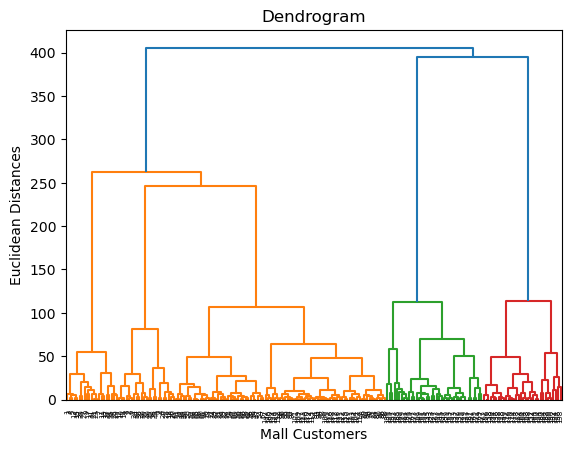

In [50]:
#Import the hierarchial Clustering module from the SciPy library
import scipy.cluster.hierarchy as sch

# Create a dendrogram plot using hierarchical clustering
# 'X' is the dataset, and 'method' specifies the linkage method ('ward' minimizes variance)
dendrogram= sch.dendrogram(sch.linkage(X, method= 'ward'))

#title of 
plt.title('Dendrogram')
plt.xlabel('Mall Customers')
plt.ylabel('Euclidean Distances')
plt.show()


##Building a Model for Agglomerative Clustering

In [53]:
#There will be no separate Training and Testing dataset in the Unsupervised Learning
#Importing Agglomerative Clustering Model from Sklearn
from sklearn.cluster import AgglomerativeClustering


In [63]:
#Creating an Object of class hc Agglomerative Clustering
hc= AgglomerativeClustering(n_clusters = 5, metric= 'euclidean', linkage='ward')

#Training the hierarchical clustering Model on the dataset
y_hc= hc.fit_predict(X)

# fit(), method used to compute the clustering, learns the clusters based on the input data X.
#predict(), fter fitting the model, assigns each data point in X to one of the clusters.



##Let's change the parameter affinity/metric to 'manhattan distance' method and also change the no of clusters to 3

In [66]:
hc1= AgglomerativeClustering(n_clusters= 3, metric= 'manhattan', linkage= 'average')
y_hc1= hc1.fit_predict(X)

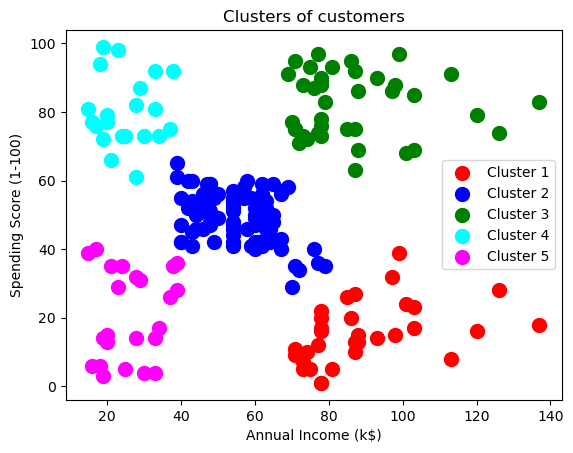

In [72]:
#Visualizing the Model Using y_hc

# Plot the data points belonging to Cluster 1
# Points in Cluster 1 are colored red
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s=100, c='red', label='Cluster 1')

#plot the data points belonging to Cluster 2
#Points in Cluster 2 are colored blue
plt.scatter(X[y_hc== 1,0], X[y_hc == 1, 1], s=100, c='blue', label='Cluster 2')

#plot the data points belonging to Cluster 3
#Points in Cluster 3 are colored green
plt.scatter(X[y_hc== 2, 0], X[y_hc == 2, 1], s=100, c='green', label= 'Cluster 3')

#plot the data points belonging to Cluster 4
#Points in Cluster 4 are colored cyan
plt.scatter(X[y_hc== 3, 0], X[y_hc== 3, 1], s=100, c='cyan', label= 'Cluster 4')

#plot the data points belonging to Cluster 5
#Points in Cluster 4 are colored magenta
plt.scatter(X[y_hc== 4, 0], X[y_hc== 4, 1], s=100, c='magenta', label= 'Cluster 5')

# Set the title of the scatter plot
plt.title('Clusters of customers')

# Set the label for the x-axis
plt.xlabel('Annual Income (k$)')

# Set the label for the y-axis
plt.ylabel('Spending Score (1-100)')

# Display the legend to identify each cluster
plt.legend()

# Show the plot
plt.show()

#Observations - Cluster 1(Red) can be targeted specifically since they belong to high income group but their spending score is quite less.

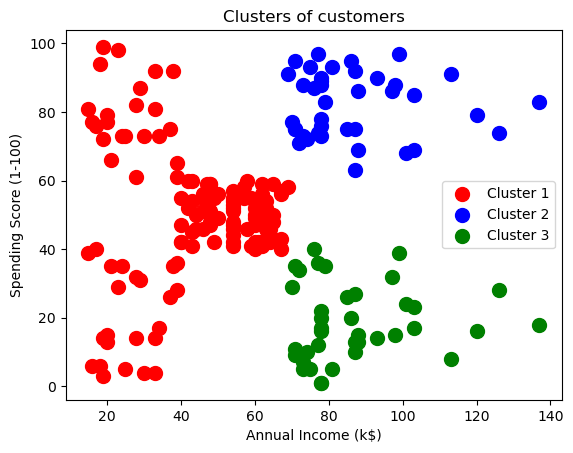

In [77]:
##Visualize the Model Using y_hc1

plt.scatter(X[y_hc1 == 0, 0], X[y_hc1 == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_hc1 == 1, 0], X[y_hc1 == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_hc1 == 2, 0], X[y_hc1 == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

##Observations:
Five Clusters are appropriate for this dataset - dendogram clearly helps us to identify the optimal number of clusters.
When we visualize with three clusters, output does not look right and cannot give clear insights.
